# Drawing Functions (Optional Section)

## Draw a Line Segment on an Image

The `cv2.line` function in the OpenCV library allows you to draw a straight line segment connecting two specified points on an image. This function provides control over line appearance, thickness, and antialiasing, making it a versatile tool for various computer vision and image processing tasks {cite:p}`opencv_library, OpenCVDocumentation`.

* **syntax:**

```
cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> None
```

* **Parameters**

- `img`: The input image where the line will be drawn.
- `pt1`: The starting point (x, y) of the line segment.
- `pt2`: The ending point (x, y) of the line segment.
- `color`: The color of the line in BGR format (Blue, Green, Red).
- `thickness`: (Optional) The thickness of the line. Default is 1. Use a negative value to fill the line with the specified color.
- `lineType`: (Optional) The type of line to draw. Default is 8-connected line (cv2.LINE_8). Other options include 4-connected line (cv2.LINE_4) and antialiased line (cv2.LINE_AA).
- `shift`: (Optional) The fractional pixel shift within the line coordinates. Default is 0.

* **Line Types**

- `cv2.LINE_8`: 8-connected line. Used by default.
- `cv2.LINE_4`: 4-connected line.
- `cv2.LINE_AA`: Antialiased line, providing smoother edges.

* **Behavior**

- The line is clipped to remain within the image boundaries.
- Integer coordinates without antialiasing use Bresenham algorithms (8-connected or 4-connected).
- Thick lines have rounded endings for a smoother appearance.
- Antialiased lines are drawn using Gaussian filtering to reduce aliasing artifacts.

* **Return Value**

This function modifies the input image (`img`) directly to include the specified line segment. No return value is provided (`None`).

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt  # Import the plotting library

from matplotlib.colors import to_rgb

def color2rgb(color):
    '''
    Converts a color in any format supported by matplotlib to an RGB tuple.

    Parameters:
    color (str): A color specification in any format recognized by matplotlib.

    Returns:
    tuple: A tuple representing the RGB values of the input color, ranging from 0 to 255.
    '''
    return tuple([int(255 * x) for x in to_rgb(color)])

# Set font properties for plots
plt.rcParams.update({'font.family': 'Calibri', 'axes.titlesize': 16})

# Define a function to display images with titles and optional settings
def ImShow(Images, Names, title='Images', grayscale=False, figsize=(9.5, 4.5)):
    '''
    Display a pair of images side by side.

    Parameters:
    Images (list): List of two images to be displayed.
    Names (list): List of two names or labels for the images.
    title (str, optional): Title for the figure. Defaults to 'Images'.
    grayscale (bool, optional): If True, display images in grayscale. Defaults to False.
    figsize (tuple, optional): Figure size (width, height) in inches. Defaults to (9.5, 4.5).

    Returns:
    matplotlib.figure.Figure: The figure containing the displayed images.
    numpy.ndarray: The array of subplots for further manipulation.
    '''
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=figsize)  # Create a figure with 1 row and 2 columns of subplots
    ax = ax.ravel()  # Flatten the subplots for easier manipulation

    # Iterate over the first two images
    for i in range(2):
        # Display the image in grayscale if grayscale is True, otherwise in color
        ax[i].imshow(Images[i], cmap='gray' if grayscale else None)
        ax[i].set_aspect(1)  # Set aspect ratio to 1 (square aspect)
        ax[i].axis('off')  # Turn off axis
        ax[i].set_title(Names[i], weight='bold')  # Set image title with bold font

    if title:
        # Set main title if provided
        fig.suptitle(title, weight='bold', fontsize=18)

    plt.tight_layout()  # Adjust layout for better spacing
    return fig, ax

## Sample Images

In this section, we utilize a few images from my personal image library. All images have been resized to 2000 by 1500 for ease of computational analysis.

In [2]:
from skimage import io

class Sample_Images:
    '''
    A class for providing descriptions and images of images.

    Attributes:
    Names (list): List of available image names.

    Methods:
    description(name):
    - Provides a description of the given image name.

    read_image(name):
    - Reads and returns the image as a matrix for the given image name.
    
    title(name):
    - Removes underscores from the image name and provides a formatted title.

    '''
    Names = ['Lake_Como', 'Northwest_Gate', 'Qiansimen_Bridge',
             'Rabbits', 'Squirl', 'Varenna', 'Waterfront']

    def __init__(self):
        pass

    def description(self, name):
        '''
        Provides a description for the given image name.

        Parameters:
        name (str): The name of the image.

        Returns:
        description (str): A description of the image.
        '''
        descriptions = {
            'Lake_Como': 'A lake in Northern Italy’s Lombardy region.',
            'Northwest_Gate': 'Captures the Northwest Gate of Chongqing, China.',
            'Qiansimen_Bridge': 'Features the Qiansimen Bridge in Chongqing, China.',
            'Rabbits': 'Depicts rabbits at Jericho Beach Park in Vancouver, BC, Canada.',
            'Squirl': 'Features a squirrel at Sea to Sky Gondola in Vancouver, BC, Canada.',
            'Varenna': 'Portrays the picturesque village of Varenna on the shores of Lake Como, Italy.',
            'Waterfront': 'This image was taken from Vancouver Waterfront.'
        }

        if name not in self.Names:
            raise ValueError(f'Image name must be one of {", ".join(self.Names)}')

        return descriptions[name]

    def title(self, name):
        '''
        Removes underscores from the image name and provides a formatted title.

        Parameters:
        name (str): The name of the image.

        Returns:
        title (str): A formatted title for the image.
        '''
        if name not in self.Names:
            raise ValueError(f'Image name must be one of {", ".join(self.Names)}')

        return name.replace("_", " ")

    def read_image(self, name):
        '''
        Reads and returns the image as a matrix for the given image name.

        Parameters:
        name (str): The name of the image.

        Returns:
        image (ndarray): The loaded image in ndarray format.
        '''
        if name not in self.Names:
            raise ValueError(f'Image name must be one of {", ".join(self.Names)}')

        url = f'https://raw.githubusercontent.com/HatefDastour/ENGG_680/main/Files/{name}.jpg'
        return io.imread(url)

<span style='color:Blue'><strong>Example</strong></span>: In this example, we load sample images, create a modified image with a yellow line, and display both the original and modified images with titles.

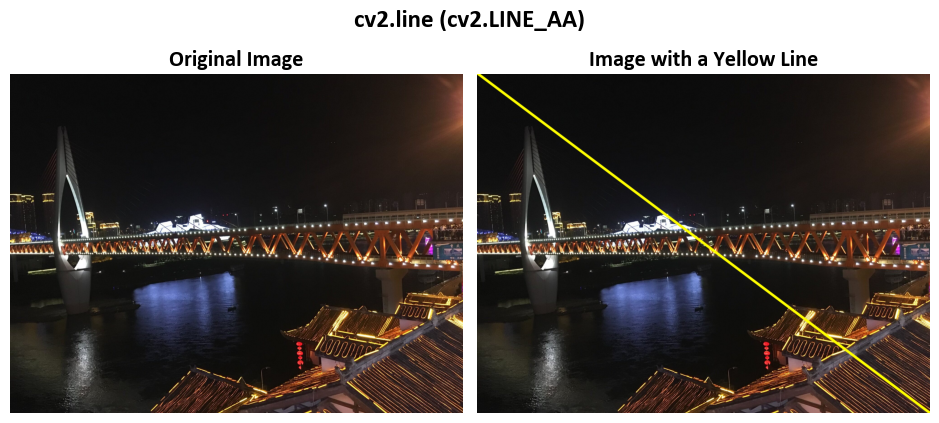

In [3]:
import cv2
from sklearn.datasets import load_sample_image

# Load an example image
Images = Sample_Images()
image_name = 'Qiansimen_Bridge'
Img = Images.read_image(image_name)

# Create an image with a yellow line
Out = Img.copy()  # Create a copy of the image

# Draw a yellow line from top-left to bottom-right
_ = cv2.line(Out, (0, 0), Out.shape[:2][::-1], color2rgb('Yellow'),
             thickness= 10, lineType=cv2.LINE_AA)

# Show the original and modified images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Yellow Line'], title='cv2.line (cv2.LINE_AA)')

In this code example, we perform the following task(s):

```python
_ = cv2.line(Out, (0, 0), Out.shape[:2][::-1], color2rgb('Yellow'), thickness=10, lineType=cv2.LINE_AA)
```

- `cv2.line`: This function, part of the OpenCV library, is employed to draw a line on an image.

- `Out`: This denotes the image on which the line is drawn.

- `(0, 0)`: This represents the starting point of the line, defined as a tuple of coordinates. In this context, the line commences from the top-left corner of the image, located at coordinates (0, 0).

- `Out.shape[:2][::-1]`: This segment specifies the endpoint of the line. It employs Python slicing and list manipulation to acquire the shape of the `Out` image, represented as a tuple (height, width). The `[::-1]` operation is utilized to invert the order of elements in the tuple. Consequently, this code sets the endpoint of the line to the bottom-right corner of the image.

- `color2rgb('Yellow')`: This designates the color of the line. It seems to access the color 'Yellow' using a function or method named `color2rgb`.

- `thickness=10`: This establishes the line's width, with a value of 10 denoting that the line will be 10 pixels wide.

- `lineType=cv2.LINE_AA`: This specifies the type of line utilized for drawing. Here, `cv2.LINE_AA` is employed, indicating the use of anti-aliased lines that result in smoother edges for the line.

## Rectangle

The function you're referring to is `cv2.rectangle` from the OpenCV library in Python. It's used to draw a rectangle on an image. Let's break down the function signature and its parameters {cite:p}`opencv_library, OpenCVDocumentation`:

**Function Signature:**

```
cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> None
```

**Parameters:**

- `img`: The input image on which the rectangle will be drawn.
- `pt1`: The coordinates (x1, y1) of the top-left corner of the rectangle.
- `pt2`: The coordinates (x2, y2) of the bottom-right corner of the rectangle.
- `color`: The color of the rectangle in BGR format (Blue, Green, Red).
- `thickness`: (Optional) The thickness of the rectangle's edges. If a positive value is given, it draws the edges of the rectangle. If a negative value is given, it fills the rectangle with the specified color. The default is 1, which draws a thin rectangle outline.
- `lineType`: (Optional) The type of the rectangle's edges. Default is 8-connected line (cv2.LINE_8). Other options include 4-connected line (cv2.LINE_4) and antialiased line (cv2.LINE_AA).
- `shift`: (Optional) The number of fractional bits in the point coordinates. This parameter allows sub-pixel positioning of the rectangle, providing smoother results for antialiased rectangles. The default is 0.

**Behavior:**

- The rectangle is drawn with the top-left corner specified by `pt1` and the bottom-right corner specified by `pt2`.
- The rectangle can be either a filled rectangle (when `thickness` is negative) or an outlined rectangle (when `thickness` is positive).
- The rectangle can be drawn with different line types, affecting the appearance of its edges (8-connected, 4-connected, or antialiased).

**Return Value:**

This function modifies the input image `img` directly, drawing the specified rectangle on it. The function does not return a value (`None`).

<font color='Blue'><b>Example</b></font>:

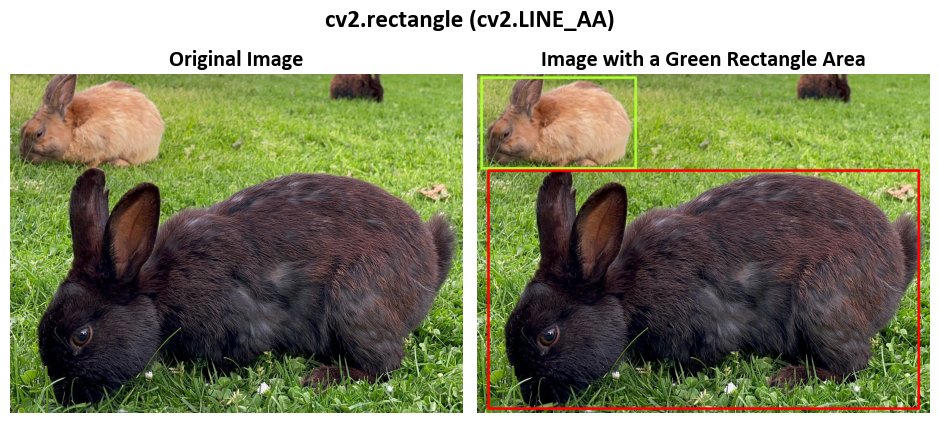

In [4]:
import cv2

# Load an example image
Images = Sample_Images()
image_name = 'Rabbits'
Img = Images.read_image(image_name)

# Create an image with a yellow line
Out = Img.copy()  # Create a copy of the image

# Draw rectangles
_ = cv2.rectangle(Out, (20, 20), (700, 420), color2rgb('GreenYellow'),
                  thickness=10, lineType=cv2.LINE_AA)
_ = cv2.rectangle(Out, (50, 430), (1950, 1480), color2rgb('Red'),
                  thickness=10, lineType=cv2.LINE_AA)

# Show the original and modified images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Green Rectangle Area'],
                 title='cv2.rectangle (cv2.LINE_AA)')

In this code example, we perform the following task(s):

```python
_ = cv2.rectangle(Out, (20, 20), (700, 420), color2rgb('GreenYellow'), thickness=10, lineType=cv2.LINE_AA)
_ = cv2.rectangle(Out, (50, 430), (1950, 1480), color2rgb('Red'), thickness=10, lineType=cv2.LINE_AA)
```

- `cv2.rectangle`: This function, a part of the OpenCV library, is utilized for drawing rectangles on an image.

- `Out`: This denotes the image or frame on which the rectangles are drawn.

- `(20, 20)`: This represents the coordinates of the top-left corner of the first rectangle, positioned at point (20, 20) within the image.

- `(700, 420)`: These coordinates specify the position of the bottom-right corner of the first rectangle, defining its width and height. In this case, it's located at point (700, 420) in the image.

- `color2rgb('GreenYellow')`: This defines the color of the first rectangle. It appears to access the color 'GreenYellow' using a function or method named `color2rgb`.

- `thickness=10`: This establishes the width of the border lines for the rectangles. A value of 10 signifies that the border lines will be 10 pixels wide.

- `lineType=cv2.LINE_AA`: This designates the type of lines used for drawing the rectangles. Here, `cv2.LINE_AA` is employed, indicating the use of anti-aliased lines, resulting in smoother edges.

The second rectangle is very similar to the first one, with the following differences:

- The top-left corner of the second rectangle is located at point (50, 430).
- The bottom-right corner of the second rectangle is positioned at point (1950, 1480).
- The color of the second rectangle is set to red, utilizing a color defined in the `Colors` dictionary or variable.
- The border lines of the second rectangle are also 10 pixels wide.
- Anti-aliased lines are used for drawing the second rectangle.

<font color='Blue'><b>Example</b></font>:

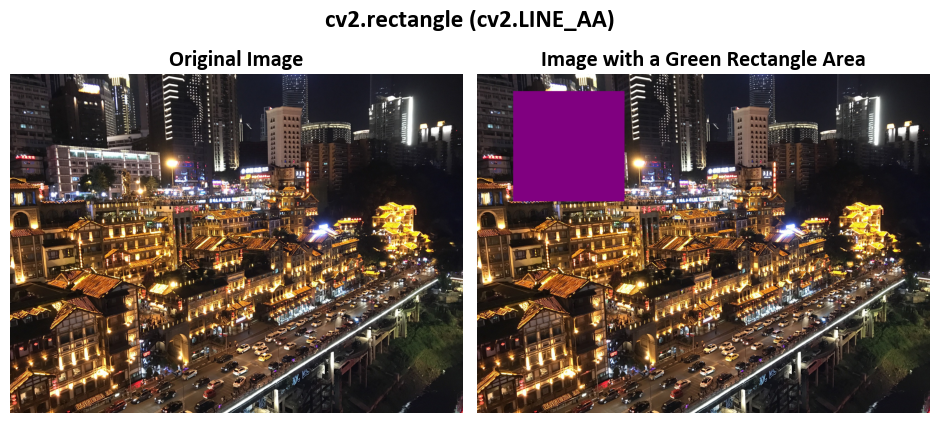

In [5]:
import cv2

# Load an example image
Images = Sample_Images()
image_name = 'Northwest_Gate'
Img = Images.read_image(image_name)

# Create an image with a yellow line
Out = Img.copy()  # Create a copy of the image

# Draw a purple filled rectangle on the 'Out' image
_ = cv2.rectangle(Out, (160, 80), (650, 565), color2rgb('Purple'),
                  thickness=-1, lineType=cv2.LINE_AA)

# Show the original and modified images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Green Rectangle Area'],
                 title='cv2.rectangle (cv2.LINE_AA)')

In this code example, we perform the following task(s):

```python
_ = cv2.rectangle(Out, (160, 80), (650, 565), color2rgb('Purple'), thickness=-1, lineType=cv2.LINE_AA)
```

- `cv2.rectangle`: This function, a component of the OpenCV library, is employed to draw filled rectangles on an image.

- `Out`: This refers to the image or frame on which the filled rectangle is drawn.

- `(160, 80)`: These are the coordinates of the top-left corner of the rectangle, specifying the position of the top-left corner in the image with (160, 80) representing the (x, y) coordinates.

- `(650, 565)`: These coordinates indicate the position of the bottom-right corner of the rectangle, effectively determining the width and height of the rectangle. In this case, it's situated at (650, 565).

- `color2rgb('Purple')`: This designates the color of the filled rectangle. It appears to access the color 'Purple' using a function or method named `color2rgb`.

- `thickness=-1`: This parameter controls the thickness of the rectangle's border lines. A setting of -1 signifies that the rectangle will be filled with the specified color, which in this case is purple. Consequently, it creates a filled rectangle.

- `lineType=cv2.LINE_AA`: This specifies the type of lines used for drawing the rectangle. Here, `cv2.LINE_AA` is utilized, indicating the use of anti-aliased lines, resulting in smoother edges for the drawn shape.

## Circle

This `cv2.circle` function is highly versatile and empowers you to specify the circle's center, radius, color, thickness, and other properties, giving you full control over the appearance of the circle you want to draw on the image {cite:p}`opencv_library, OpenCVDocumentation`.

```
cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]]) -> None
```

1. `cv2`: This is the namespace or module in OpenCV that provides a collection of functions for various image processing tasks.

2. `circle`: This function is specifically designed to draw circles on images using the OpenCV library.

3. `img`: This is the input image on which the circle will be drawn. It's represented as a NumPy array, and you'll be modifying this image to add the circle.

4. `center`: A tuple `(x, y)` representing the coordinates of the center of the circle within the image. The point `(0, 0)` is usually considered the top-left corner of the image.

5. `radius`: A numerical value that specifies the radius of the circle in pixels. This value determines the size of the circle.

6. `color`: The color of the circle, represented as a tuple with three elements `(B, G, R)`, where each element represents the intensity of the Blue, Green, and Red color channels, respectively. The values range from 0 to 255, indicating the color's intensity.

7. `thickness` (optional): An optional parameter that defines the thickness of the circle's outline. If this parameter is given a positive value, the circle is drawn with the specified thickness. Setting `thickness` to -1 results in a filled circle with the specified color.

8. `lineType` (optional): Another optional parameter that determines the type of boundary line for the circle. It's an integer value that indicates how the circle boundary is drawn. The default is typically an 8-connected line, which means the circle boundary is connected. An alternative option is `cv2.LINE_AA`, which creates an anti-aliased line, providing smoother edges.

9. `shift` (optional): An additional optional parameter that controls the precision of the center and radius by specifying the number of fractional bits. It's mainly used for fixed-point arithmetic and allows for finer control over the circle's position and size.

The `-> None` part in the documentation indicates that the function does not return any value. Instead, it directly modifies the input image by drawing the specified circle on it.

<font color='Blue'><b>Example</b></font>:

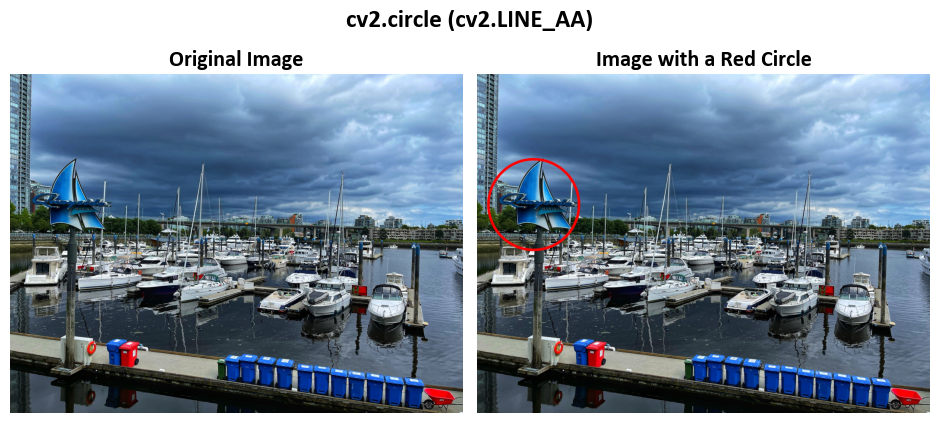

In [6]:
import cv2

# Load an example image
Images = Sample_Images()
image_name = 'Waterfront'
Img = Images.read_image(image_name)

# Create an image with a yellow line
Out = Img.copy()  # Create a copy of the image

# Draw a red circle on the 'Out' image
_ = cv2.circle(Out, (250, 580), 200, color2rgb('Red'),
               thickness= 10, lineType=cv2.LINE_AA)

# Display both the original and modified images with descriptive titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Red Circle'],
                 title='cv2.circle (cv2.LINE_AA)')

In this code example, we perform the following task(s):

```python
_ = cv2.circle(Out, (250, 580), 200, color2rgb('Red'), thickness=10, lineType=cv2.LINE_AA)
```

- `cv2.circle`: This function, a component of the OpenCV library, is utilized to draw circles on an image.

- `Out`: This refers to the image or frame on which the circle is drawn.

- `(250, 580)`: These are the coordinates of the center point of the circle, specifying the (x, y) coordinates for the circle's center in the image. In this case, it's positioned at (250, 580).

- `200`: This parameter specifies the radius of the circle. The value 200 indicates that the circle's radius is 200 pixels.

- `color2rgb('Red')`: This designates the color of the circle. It seems to access the color 'Red' using a function or method named `color2rgb`.

- `thickness=10`: This parameter controls the thickness of the circle's border, setting it to be 10 pixels wide.

- `lineType=cv2.LINE_AA`: This parameter specifies the type of lines used for drawing the circle. Here, `cv2.LINE_AA` is employed, indicating the use of anti-aliased lines, which results in smoother edges for the circle.

<font color='Blue'><b>Example</b></font>:

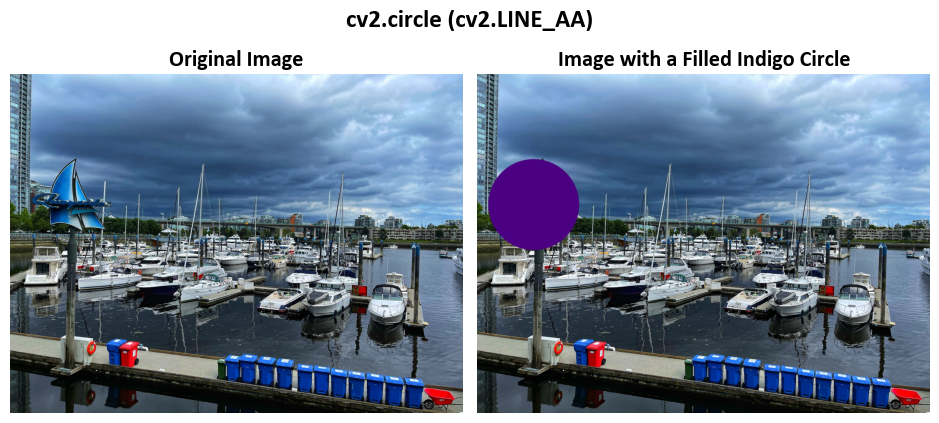

In [7]:
import cv2

# Load an example image
Images = Sample_Images()
image_name = 'Waterfront'
Img = Images.read_image(image_name)

# Create an image with a yellow line
Out = Img.copy()  # Create a copy of the image

# Draw a red circle on the 'Out' image
_ = cv2.circle(Out, (250, 580), 200, color2rgb('Indigo'),
               thickness= -1, lineType=cv2.LINE_AA)

# Display both the original and modified images with descriptive titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Filled Indigo Circle'],
                 title='cv2.circle (cv2.LINE_AA)')

In this code example, we perform the following task(s):

```python
_ = cv2.circle(Out, (250, 580), 200, color2rgb('Indigo'), thickness=-1, lineType=cv2.LINE_AA)
```

- `cv2.circle`: This function, a component of the OpenCV library, is utilized to draw filled circles on an image.

- `Out`: This refers to the image or frame on which the filled circle is drawn.

- `(250, 580)`: These are the coordinates of the center point of the circle, specifying the (x, y) coordinates for the circle's center in the image. In this case, it's positioned at (250, 580).

- `200`: This parameter specifies the radius of the circle. The value 200 indicates that the circle's radius is 200 pixels.

- `color2rgb('Indigo')`: This designates the color of the filled circle. It seems to access the color 'Indigo' using a function or method named `color2rgb`.

- `thickness=-1`: This parameter controls the thickness of the circle's border. Setting it to -1 means that the circle will be filled with the specified color (in this case, indigo), resulting in a filled circle.

- `lineType=cv2.LINE_AA`: This parameter specifies the type of lines used for drawing the circle. Here, `cv2.LINE_AA` is employed, indicating the use of anti-aliased lines, which results in smoother edges for the circle.

## Ellipse


This `cv2.ellipse` function is versatile and empowers you to specify the ellipse's center, major and minor axes, rotation angle, arc angles, color, thickness, and other properties, giving you full control over the appearance of the ellipse you want to draw on the image {cite:p}`opencv_library, OpenCVDocumentation`.

```
cv2.ellipse(img, center, axes, angle, startAngle, endAngle, color[, thickness[, lineType[, shift]]]) -> None
```

1. `cv2`: This is the namespace or module in OpenCV that contains various image processing functions.

2. `ellipse`: This function is specifically designed to draw ellipses (oval shapes) on images using the OpenCV library.

3. `img`: This is the input image on which the ellipse will be drawn. It's represented as a NumPy array, and you'll be modifying this image to add the ellipse.

4. `center`: A tuple `(x, y)` representing the coordinates of the center of the ellipse within the image. The point `(0, 0)` is typically considered the top-left corner of the image.

5. `axes`: A tuple `(majorAxis, minorAxis)` representing the lengths of the major and minor axes of the ellipse. These axes determine the size and shape of the ellipse.

6. `angle`: The rotation angle of the ellipse in degrees. The rotation is applied to the major axis, which helps you orient the ellipse in a specific direction.

7. `startAngle`: The starting angle of the elliptical arc in degrees. The arc is drawn from this angle.

8. `endAngle`: The ending angle of the elliptical arc in degrees. The arc is drawn up to this angle, forming a partial ellipse if `startAngle` is not 0.

9. `color`: The color of the ellipse, represented as a tuple with three elements `(B, G, R)`, where each element represents the intensity of the Blue, Green, and Red color channels, respectively. The values range from 0 to 255, indicating the color's intensity.

10. `thickness` (optional): An optional parameter that defines the thickness of the ellipse's outline. If this parameter is given a positive value, the ellipse is drawn with the specified thickness. Setting `thickness` to -1 results in a filled ellipse with the specified color.

11. `lineType` (optional): Another optional parameter that determines the type of boundary line for the ellipse. It's an integer value that indicates how the ellipse boundary is drawn. The default is typically an 8-connected line, which means the boundary is connected. An alternative option is `cv2.LINE_AA`, which creates an anti-aliased line, providing smoother edges.

12. `shift` (optional): An additional optional parameter that controls the precision of the center and the axes by specifying the number of fractional bits. It's mainly used for fixed-point arithmetic, allowing for finer control over the ellipse's position, size, and rotation.

The `-> None` part in the documentation indicates that the function does not return any value. Instead, it directly modifies the input image by drawing the specified ellipse on it.

<font color='Blue'><b>Example</b></font>:

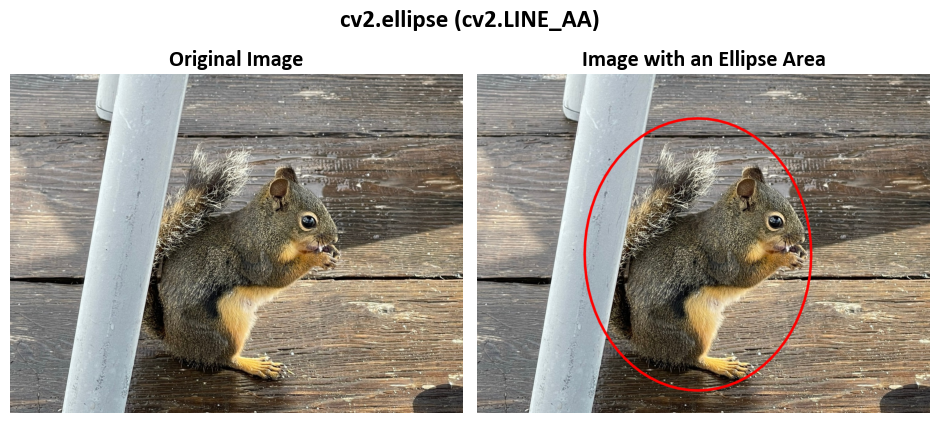

In [8]:
import cv2

# Load an example image
Images = Sample_Images()
image_name = 'Squirl'
Img = Images.read_image(image_name)

# Create an image with a yellow line
Out = Img.copy()  # Create a copy of the image

# Draw a red ellipse
_ = cv2.ellipse(Out, (975, 800), (500, 600), 0, 0, 360, color2rgb('Red'),
                thickness= 10, lineType=cv2.LINE_AA)

# Display both the original and modified images with descriptive titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with an Ellipse Area'],
                 title='cv2.ellipse (cv2.LINE_AA)')

In this code example, we perform the following task(s):

```python
_ = cv2.ellipse(Out, (975, 800), (500, 600), 0, 0, 360, color2rgb('Red'), thickness=10, lineType=cv2.LINE_AA)
```

- `cv2.ellipse`: This function, a part of the OpenCV library, is employed to draw an ellipse on an image.

- `Out`: This denotes the image or frame on which the ellipse is drawn.

- `(975, 800)`: These are the coordinates of the center point of the ellipse, specifying the (x, y) coordinates for the center of the ellipse in the image. In this case, it's positioned at (975, 800).

- `(500, 600)`: These values specify the lengths of the major and minor axes of the ellipse. The first value, 500, represents the length of the major axis, and the second value, 600, represents the length of the minor axis.

- `0`: This value represents the rotation angle of the ellipse. In this context, it's set to 0 degrees, indicating that the ellipse is not rotated.

- `0, 360`: These values represent the start and end angles of the ellipse's arc. In this case, it starts at 0 degrees and ends at 360 degrees, effectively drawing a complete ellipse.

- `color2rgb('Red')`: This parameter designates the color of the ellipse. It seems to access the color 'Red' using a function or method named `color2rgb`.

- `thickness=10`: This parameter controls the thickness of the ellipse's border lines, with a value of 10 indicating that the border lines will be 10 pixels wide.

- `lineType=cv2.LINE_AA`: This parameter specifies the type of lines used for drawing the ellipse. Here, `cv2.LINE_AA` is employed, indicating the use of anti-aliased lines, which results in smoother edges for the ellipse.

## Clip Line


The `cv2.clipLine` function is useful for various image processing tasks where you need to ensure that a line segment does not exceed the specified region, such as when rendering or analyzing objects within a certain image area {cite:p}`opencv_library, OpenCVDocumentation`.


```
cv2.clipLine(imgRect, pt1, pt2) -> retval, pt1, pt2
```

1. `cv2`: This is the namespace or module in OpenCV that contains various image processing functions.

2. `clipLine`: This function is used for clipping a line segment within a given image rectangle using OpenCV.

3. `imgRect`: This parameter represents the rectangular region within which the line segment should be clipped. It's usually defined as a tuple or a rectangle object specifying the boundaries of the image region.

4. `pt1`: A tuple `(x1, y1)` representing the starting point of the line segment you want to clip. This point is defined by its x and y coordinates.

5. `pt2`: A tuple `(x2, y2)` representing the ending point of the line segment you want to clip. This point is also defined by its x and y coordinates.

6. `retval`: The return value of the function, which indicates whether the line segment lies fully, partially, or completely outside the specified image rectangle. This return value helps you understand whether the line segment was successfully clipped or not.

The `->` arrow in the documentation indicates that the function returns a value. In this case, it returns `retval`, which represents the result of the clipping operation, along with the updated `pt1` and `pt2` points, which may have been adjusted during the clipping process.

The purpose of this function is to ensure that a line segment defined by `pt1` and `pt2` lies within the specified image rectangle (`imgRect`). If the line segment extends beyond the boundaries of the rectangle, it is clipped to fit within the rectangle, and the function provides information about the clipping result.

<font color='Blue'><b>Example</b></font>:

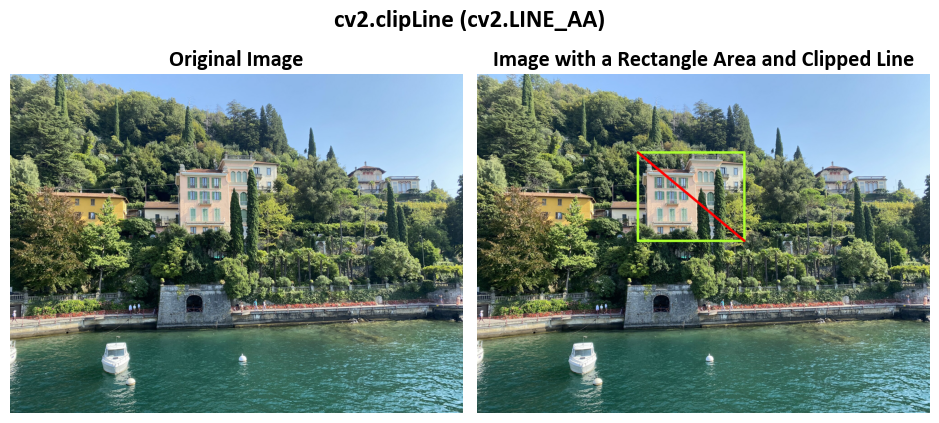

In [9]:
import cv2

# Load an example image
Images = Sample_Images()
image_name = 'Varenna'
Img = Images.read_image(image_name)

# Create an image with a yellow line
Out = Img.copy()  # Create a copy of the image

# Draw a Clip Line
_ = cv2.rectangle(Out, (710, 350), (1180, 740), color2rgb('GreenYellow'), thickness = 10)

# Use cv2.clipLine to determine the clipped line segment
_ = ret, p1, p2 = cv2.clipLine((0, 0, Out.shape[0], Out.shape[1]), (710, 350), (1180, 740))

# Check if the line segment is within the image boundaries
if ret:
    cv2.line(Out, p1, p2, color2rgb('Red'), thickness = 10)

# Show the original and modified images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Rectangle Area and Clipped Line'],
                 title='cv2.clipLine (cv2.LINE_AA)')

In this code example, we perform the following task(s):

```python
_ = cv2.rectangle(Out, (710, 350), (1180, 740), color2rgb('GreenYellow'), thickness=10)
```

- `cv2.rectangle`: This function, part of the OpenCV library, is used to draw a rectangle on an image.

- `Out`: This is the image on which the rectangle is being drawn.

- `(710, 350)`: These coordinates specify the position of the top-left corner of the rectangle within the image, with (710, 350) representing the (x, y) coordinates.

- `(1180, 740)`: These coordinates define the position of the bottom-right corner of the rectangle, effectively specifying the width and height of the rectangle. In this case, it's positioned at (1180, 740).

- `color2rgb('GreenYellow')`: This parameter designates the color of the rectangle, accessing the color 'GreenYellow' using a function or method named `color2rgb`.

- `thickness=10`: This parameter controls the thickness of the rectangle's border lines, with a value of 10 indicating that the border will be 10 pixels wide.

This part of the code draws a GreenYellow rectangle on the image (`Out`) with its top-left corner at (710, 350) and the bottom-right corner at (1180, 740). The rectangle is drawn with a border that is 10 pixels wide.

```python
# Use cv2.clipLine to determine the clipped line segment
_ = ret, p1, p2 = cv2.clipLine((0, 0, Out.shape[0], Out.shape[1]), (710, 350), (1180, 740))
```

- `cv2.clipLine`: This is a function from the OpenCV library used to clip a line segment to a specified rectangle.

- `ret, p1, p2`: These variables are used to store the results of the `cv2.clipLine` function.

- `cv2.clipLine((0, 0, Out.shape[0], Out.shape[1])...`: This function is called to determine the clipped line segment within the specified rectangle. It takes three arguments:

  - The first argument `(0, 0, Out.shape[0], Out.shape[1])` represents the coordinates of the rectangle within which the line segment is to be clipped. It defines the top-left corner (0, 0) and the bottom-right corner as the image dimensions (`Out.shape[0]` and `Out.shape[1`]).

  - The second and third arguments `(710, 350)` and `(1180, 740)` represent the endpoints of the original line segment.

The `cv2.clipLine` function calculates the clipped line segment within the specified rectangle and returns the results, which can be used for further processing or analysis. The `ret` variable may indicate whether a valid line segment was found, and `p1` and `p2` store the endpoints of the clipped line segment.

```python
# Check if the line segment is within the image boundaries
if ret:
    cv2.line(Out, p1, p2, color2rgb('Red'), thickness=10)
```

- This part checks whether the line segment is within the image boundaries.

- If `ret` (returned by `cv2.clipLine`) is true, it means a valid line segment was found within the specified rectangle, and the following code is executed.

- `cv2.line(Out, p1, p2, color2rgb('Red'), thickness=10)`: This line of code draws a red line on the image (`Out`) using the endpoints `p1` and `p2` of the clipped line segment. The line is drawn with a thickness of 10 pixels.

This code segment handles the case where the line segment is found within the image boundaries and proceeds to draw a red line connecting the clipped endpoints.

## Get Text Size

The `cv2.getTextSize` function is valuable when you need to calculate the size of text before placing it on an image, ensuring that the text fits within a designated area and enabling accurate positioning for a variety of text rendering tasks in image processing {cite:p}`opencv_library, OpenCVDocumentation`.


```
cv2.getTextSize(text, fontFace, fontScale, thickness) -> retval, baseLine
```

1. `cv2`: This is the namespace or module in OpenCV that contains various image processing functions.

2. `getTextSize`: This function is used to determine the size of a text string when rendered using a specific font and size, allowing you to prepare for text placement within images.

3. `text`: The input text string for which you want to determine the size. It's the text you plan to render on an image.

4. `fontFace`: An integer value representing the font type or face. This value specifies the font style or family to be used when rendering the text. Common font types include constants like `cv2.FONT_HERSHEY_SIMPLEX`, `cv2.FONT_HERSHEY_PLAIN`, etc.

5. `fontScale`: A numeric value specifying the size of the font. This value affects the relative size of the rendered text in relation to the image.

6. `thickness`: An integer value representing the thickness of the lines used to render the text. This parameter affects the visual weight or boldness of the text.

7. `retval`: The return value of the function, which is a tuple `(width, height)` representing the dimensions (width and height) of the bounding box that would enclose the rendered text string. This information helps you understand how much space the text will occupy when placed on the image.

8. `baseLine`: The baseline offset of the text. It's an additional return value indicating the distance from the top of the bounding box to the baseline of the first line of text. This is useful for accurately positioning the text on the image.

The `->` arrow in the documentation indicates that the function returns values. In this case, it returns `retval`, which contains the dimensions of the text bounding box, and `baseLine`, which provides the baseline offset for precise text placement.

## Put Text


The `cv2.putText` function is versatile and allows you to specify the text, its starting position, font, size, color, and other properties, giving you full control over the appearance and placement of the rendered text on the image {cite:p}`opencv_library, OpenCVDocumentation`.


```
cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) -> None
```

1. `cv2`: This is the namespace or module in OpenCV that contains various image processing functions.

2. `putText`: This function is used to render text onto an image using the specified font, size, color, and position.

3. `img`: This is the input image on which the text will be drawn. It's represented as a NumPy array, and the function modifies this image to include the rendered text.

4. `text`: The input text string that you want to render on the image.

5. `org`: A tuple `(x, y)` representing the starting point (origin) of the text within the image. This point defines the position where the text's baseline starts, with `(0, 0)` typically being the top-left corner of the image.

6. `fontFace`: An integer value representing the font type or face to be used when rendering the text. This value specifies the font style or family, e.g., `cv2.FONT_HERSHEY_SIMPLEX`, `cv2.FONT_HERSHEY_PLAIN`, etc.

7. `fontScale`: A numeric value specifying the size of the font. This value affects the relative size of the rendered text in relation to the image.

8. `color`: The color of the rendered text, represented as a tuple with three elements `(B, G, R)`. Each element represents the intensity of the Blue, Green, and Red color channels, respectively, with values ranging from 0 to 255.

9. `thickness` (optional): An optional parameter that defines the thickness of the lines used to render the text. If this parameter is given a positive value, the text is drawn with the specified thickness. If it's set to -1, the text is filled with the specified color, creating a solid text shape.

10. `lineType` (optional): Another optional parameter that determines the type of boundary line for the text characters. It's an integer value that specifies how the characters are drawn. The default is typically a connected line (8-connected). An alternative option is `cv2.LINE_AA`, which creates an anti-aliased line, providing smoother edges for the characters.

11. `bottomLeftOrigin` (optional): An additional optional parameter that indicates whether the `org` point should be treated as the bottom-left corner or the top-left corner of the text bounding box. If `bottomLeftOrigin` is `True`, the `org` point is considered the bottom-left corner; otherwise, it's considered the top-left corner. The default value is `False`.

The `-> None` part in the documentation indicates that the function does not return any value. Instead, it directly modifies the input image by rendering the specified text on it.

<font color='Blue'><b>Example</b></font>:

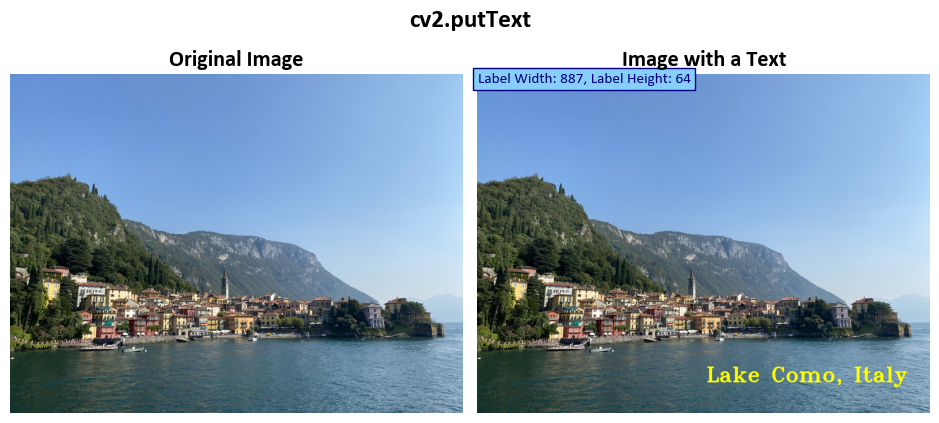

In [10]:
import cv2

# Load an example image
Images = Sample_Images()
image_name = 'Lake_Como'
Img = Images.read_image(image_name)

# Create an image with a yellow line
Out = Img.copy()  # Create a copy of the image

# Calculate the size of the text label to be added
text = 'Lake Como, Italy'
fontScale = 3
(label_width, label_height), baseline = cv2.getTextSize(text= text,
                                                        fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale= fontScale,
                                                        thickness=2)

# Add a text label to the 'Out' image
Out = cv2.putText(Out, text= text,
                  org=(Out.shape[1] - label_width - int(0.05 * Out.shape[1]),
                       Out.shape[0] - label_height - int(0.05 * Out.shape[0])),
                  fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale= fontScale,
                  color= color2rgb('Yellow'), thickness= 6)

# Show the original and modified images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Text'],
                 title='cv2.putText')

# Add a text label indicating the label width and height
label_info = f'Label Width: {label_width}, Label Height: {label_height}'
_ = ax[1].text(x=0, y=int(0.02 * Out.shape[1]), s=label_info, size=11, color='Navy',
               bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))

In this code example, we perform the following task(s):

```python
text = 'Lake Como, Italy'
fontScale = 3
(label_width, label_height), baseline = cv2.getTextSize(text=text,
                                                        fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=fontScale,
                                                        thickness=2)
```

- `text`: This variable contains the text to be added as a label. In this case, it's set to 'Lake Como, Italy'.

- `fontScale`: This variable specifies the scale of the font used for the text. A larger value, such as 3, results in larger text.

- `cv2.getTextSize`: This function, part of the OpenCV library, is used to calculate the size of the text label. It takes several arguments, including the text, font face, font scale, and thickness. The function returns the size of the text label in pixels as a tuple (`label_width`, `label_height`) and additional information stored in `baseline`.

```python
Out = cv2.putText(Out, text=text,
                  org=(Out.shape[1] - label_width - int(0.05 * Out.shape[1]),
                       Out.shape[0] - label_height - int(0.05 * Out.shape[0])),
                  fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=fontScale,
                  color=color2rgb('Yellow'), thickness=6)
```

- `cv2.putText`: This function, part of the OpenCV library, is used to add text to an image. It takes several arguments, including the image (`Out`), the text, the position (`org`) where the text should be placed, the font face, font scale, text color, and text thickness.

- `org`: This parameter specifies the origin (position) of the text. It's calculated using `Out.shape` to determine the dimensions of the image and position the text near the bottom-right corner with a slight margin from the edge.

- `color2rgb('Yellow')`: This parameter specifies the color of the text. It appears to access the color 'Yellow' using a function or method named `color2rgb`.

- `thickness=6`: This parameter controls the thickness of the text, setting it to 6 pixels.